# Load and transform raw data frames

#### Initial loading

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import gc

pd.options.display.max_rows=200
pd.options.display.max_columns=200

pd.options.display.max_colwidth=100

In [2]:
%load_ext rpy2.ipython
%R library(tidyverse)

/home/jingw222/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/home/jingw222/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/home/jingw222/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


array(['dplyr', 'purrr', 'readr', 'tidyr', 'tibble', 'ggplot2',
       'tidyverse', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'],
      dtype='<U9')

In [3]:
AISLES_FILE = 'aisles.csv'
DEPART_FILE = 'departments.csv'
ORDER_PRIOR_FILE = 'order_products__prior.csv'
ORDER_TRAIN_FILE = 'order_products__train.csv'
ORDERS_FILE = 'orders.csv'
PRODUCTS_FILE = 'products.csv'

dtypes = {'aisle_id': np.int16, 'department_id': np.int8, 'order_id': np.int32, 'product_id': np.int32, 
          'add_to_cart_order': np.int8, 'reordered': np.int8, 'user_id': np.int32, 'order_dow': np.int8,
          'order_hour_of_day': np.int8, 'days_since_prior_order': np.float16, 'order_number': np.int16}

def load_file(file, dtype=dtypes):
    zf = zipfile.ZipFile('./data/' + file + '.zip')
    if dtype is None:
        df = pd.read_csv(zf.open(file))
    else:
        df = pd.read_csv(zf.open(file), dtype=dtype)
    return df

aisles = load_file(AISLES_FILE)
depart = load_file(DEPART_FILE)
ordprodp = load_file(ORDER_PRIOR_FILE)

In [3]:
ordprodt = load_file(ORDER_TRAIN_FILE)
orders = load_file(ORDERS_FILE)
products = load_file(PRODUCTS_FILE)

In [4]:
ordprodp

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


#### Product name level features

In [4]:
def check_entries(df, col, value):
    return df.loc[df[col].str.contains(value)]

In [5]:
# products = products.set_index('product_id')
# aisles = aisles.set_index('aisle_id')
# depart = depart.set_index('department_id')

In [6]:
products['product_name_len'] = products['product_name'].str.split(r' |-').apply(len)
products['product_name_organic'] = products['product_name'].str.contains('[Oo]rganic') * 1
products['product_name_percent'] = products['product_name'].str.contains('%') * 1
products['product_name_non'] = products['product_name'].str.contains('([Ff]ree)|([Ll]ess)|(\\b[Ll]ow\\b)|([Nn]on)|([Zz]ero)|(\\b[Ll]ow)|(\\b[Nn]o\\b[^\\.])|(Un)|(Reduced)') * 1
products['product_name_origin'] = products['product_name'].str.contains('([Oo]riginal)|([Nn]atural)|([Vv]anilla)|([Pp]lain)|(\\b[Ff]resh\\b)|(Healthy)|(Raw)|(Wholesome)|(Superfood)') * 1
products['product_name_super'] = products['product_name'].str.contains('([Pp]remium)|(Special)|([Uu]ltra)|(Extra//b)|([Pp]lus)|([Ss]upreme)|(All\\b)|([Ss]trong)|([Ll]arge)|([Ee]xtreme)|([Uu]ltimate)|(Super)|([Pp]urified)|([Pp]ure)|(Whole\\b)|(Perfect)|([Mm]ulti\\b)') * 1
products['product_name_with'] = products['product_name'].str.contains('([Ww]ith)|(\+)|(\&)') * 1

products.drop('product_name', axis=1, inplace=True)

/home/jingw222/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
/home/jingw222/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
/home/jingw222/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/jingw222/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


#### Create subsamples to play with

In [15]:
x = orders.loc[orders['eval_set']=='train'].groupby('user_id')['order_number'].max()
y = orders.loc[orders['eval_set']=='test'].groupby('user_id')['order_number'].max()


In [26]:
len(x), len(y)

(131209, 75000)

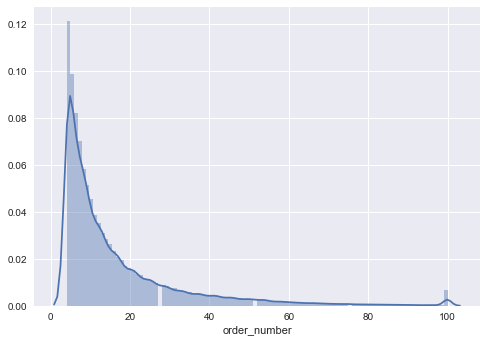

In [18]:
sns.distplot(x, bins=100)

/home/jingw222/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

  warnings.warn(x, RRuntimeWarning)


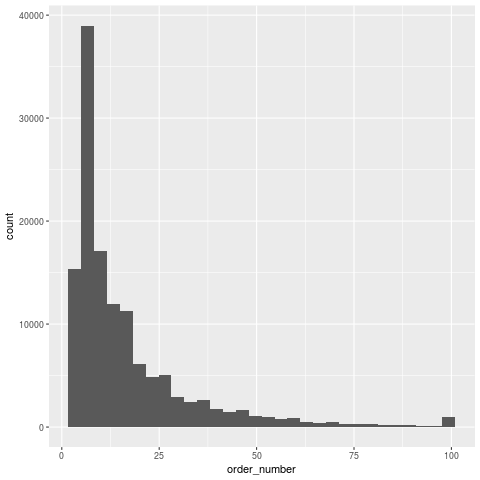

In [31]:
%%R -i x
library(ggplot2)
ggplot(x, aes(order_number)) + geom_histogram()


In [7]:
train_user_id = orders.loc[orders['eval_set']=='train', 'user_id'].values
test_user_id = orders.loc[orders['eval_set']=='test', 'user_id'].values

In [10]:
len(train_user_id), len(test_user_id)

(131209, 75000)

In [ ]:
train_user_id_sub = np.random.choice(train_user_id, size=round(0.9*len(train_user_id)), replace=False)
orders = orders.loc[~orders['user_id'].isin(train_user_id_sub)]

ordprodp = ordprodp.loc[ordprodp['order_id'].isin(orders['order_id'])]
ordprodt = ordprodt.loc[ordprodt['order_id'].isin(orders['order_id'])]

In [ ]:
# orders = orders.loc[orders['user_id']<=100]
# ordprodp = ordprodp.loc[ordprodp['order_id'].isin(orders['order_id'])]
# ordprodt = ordprodt.loc[ordprodt['order_id'].isin(orders['order_id'])]

#### Joining data

In [4]:
ordprodt = ordprodt.merge(orders[['order_id', 'user_id']], on='order_id')
ordprodt = ordprodt.loc[ordprodt['reordered']==1]
ordprodt.drop(['order_id', 'add_to_cart_order'], axis=1, inplace=True)

In [5]:
%%R -i orders -o orders
orders <- orders %>% 
  group_by(user_id) %>%
  mutate(cumsum_days = ifelse(is.na(days_since_prior_order), 0, days_since_prior_order),
         cumsum_days = cumsum(cumsum_days)) %>%
  as.data.frame()

In [ ]:
ordprodp = orders.merge(ordprodp, on='order_id')

In [ ]:
%%R -i ordprodp -o avg_user_prod_period,avg_prod_period
avg_user_prod_period <- ordprodp %>%
  arrange(user_id, order_number, product_id) %>%
  group_by(user_id, product_id) %>%
  summarise(
    avg_prod_period = (max(cumsum_days) - min(cumsum_days)) / (n() - 1),
    cumsum_days_since_last_prod_user = max(cumsum_days)
  ) %>%
  as.data.frame() 
avg_prod_period <- avg_user_prod_period %>%
  group_by(product_id) %>%
  summarise(avg_prod_period = mean(avg_prod_period, na.rm=T)) %>%
  as.data.frame()

In [ ]:
avg_user_prod_period = avg_user_prod_period.merge(products[['product_id', 'aisle_id', 'department_id']], on='product_id')

avg_user_aisle_period = avg_user_prod_period.groupby(['user_id', 'aisle_id'])['avg_prod_period'].mean().rename('avg_user_aisle_period')
avg_user_depart_period = avg_user_prod_period.groupby(['user_id', 'department_id'])['avg_prod_period'].mean().rename('avg_user_depart_period')

avg_user_prod_period = avg_user_prod_period.merge(avg_user_aisle_period.to_frame(), left_on=['user_id', 'aisle_id'], right_index=True)
avg_user_prod_period = avg_user_prod_period.merge(avg_user_depart_period.to_frame(), left_on=['user_id', 'department_id'], right_index=True)

In [ ]:
del avg_user_aisle_period, avg_user_depart_period
gc.collect()

In [ ]:
avg_user_prod_period['avg_prod_period'] = avg_user_prod_period['avg_prod_period'].where(avg_user_prod_period['avg_prod_period'].notnull(), avg_user_prod_period['avg_user_aisle_period'])
avg_user_prod_period['avg_prod_period'] = avg_user_prod_period['avg_prod_period'].where(avg_user_prod_period['avg_prod_period'].notnull(), avg_user_prod_period['avg_user_depart_period'])

In [ ]:
avg_user_prod_period.drop(['avg_user_aisle_period', 'avg_user_depart_period'], axis=1, inplace=True)

In [ ]:
if any(avg_user_prod_period['avg_prod_period'].isnull()):
    avg_user_period = avg_user_prod_period.groupby(['user_id'])['avg_prod_period'].mean().rename('avg_user_period')
    avg_user_prod_period = avg_user_prod_period.merge(avg_user_period.to_frame(), left_on=['user_id'], right_index=True)
    avg_user_prod_period['avg_prod_period'] = avg_user_prod_period['avg_prod_period'].where(avg_user_prod_period['avg_prod_period'].notnull(), avg_user_prod_period['avg_user_period'])
    avg_user_prod_period.drop('avg_user_period', axis=1, inplace=True)

In [ ]:
%%R -i ordprodp -o prods

prods <- ordprodp %>%
  arrange(user_id, order_number, product_id) %>%
  group_by(user_id, product_id) %>%
  mutate(product_time = row_number()) %>%
  ungroup() %>%
  group_by(product_id) %>%
  summarise(
    prod_num_total = n(),
    reorder_num = sum(reordered),
    first_order = sum(product_time == 1),
    second_order = sum(product_time == 2)
  ) %>%
  as.data.frame()

In [ ]:
prods['reorder_prob'] = prods['second_order'] / prods['first_order']
prods['reorder_times'] = prods['prod_num_total'] / prods['first_order']
prods['reorder_ratio'] = prods['reorder_num'] / prods['prod_num_total']
prods = prods.drop(['reorder_num', 'first_order', 'second_order'], axis=1)

prods = prods.merge(avg_prod_period, on='product_id')

products = products.merge(prods, on='product_id').drop(['aisle_id', 'department_id'], axis=1)

In [ ]:
del prods, avg_prod_period
gc.collect()

#### User level features

In [ ]:
%%R -i orders -o users
users <- orders %>%
  filter(eval_set == "prior") %>%
  group_by(user_id) %>%
  summarise(
    user_orders = max(order_number),
    user_period = sum(days_since_prior_order, na.rm = T),
    user_avg_order_period = mean(days_since_prior_order, na.rm = T)
  ) %>%
  as.data.frame()

In [ ]:
%%R -i ordprodp -o temp
temp <- ordprodp %>% 
  group_by(user_id) %>% 
  summarise(
    user_total_products = n(),
    user_reorder_ratio = sum(reordered == 1) / sum(order_number > 1),
    user_distinct_products = n_distinct(product_id)
           ) %>%
  mutate(user_prod_distinct_ratio = user_total_products / user_distinct_products) %>%
  as.data.frame()

In [ ]:
users = users.merge(temp, on='user_id')

In [ ]:
del temp
gc.collect()

In [ ]:
users['user_avg_basket'] = users['user_total_products'] / users['user_orders']
users['user_avg_dist_basket'] = users['user_distinct_products'] / users['user_orders']

users['user_avg_prod_period'] = users['user_total_products'] / users['user_period']
users['user_avg_dist_prod_period'] = users['user_distinct_products'] / users['user_period']

users.drop(['user_total_products', 'user_distinct_products'], axis=1, inplace=True)

In [ ]:
%%R -i orders -o temp
temp <- orders %>% filter(eval_set!='prior') %>% select(-order_number)

In [ ]:
avg_user_prod_period = avg_user_prod_period.merge(temp[['user_id', 'cumsum_days']], on='user_id')

avg_user_prod_period['days_since_last_prod'] = avg_user_prod_period['cumsum_days'] - avg_user_prod_period['cumsum_days_since_last_prod_user']
avg_user_prod_period = avg_user_prod_period.drop(['cumsum_days_since_last_prod_user', 'cumsum_days'], axis=1)

In [ ]:
users = users.merge(temp.drop(['cumsum_days', 'order_dow', 'order_hour_of_day'], axis=1), on='user_id')

In [ ]:
ordprodp = ordprodp.merge(temp[['user_id', 'order_dow', 'order_hour_of_day']], on='user_id')

In [ ]:
del temp
gc.collect()

#### join databases

In [ ]:
%%R -i ordprodp -o data
dow_range <- function(trn, pred){
    return(ifelse(abs(trn-pred)<=3, abs(trn-pred),7-abs(trn-pred)))
}

hour_range <- function(trn, pred){
    return(ifelse(abs(trn-pred)<=12, abs(trn-pred),24-abs(trn-pred)))
}

data <- ordprodp %>% 
  mutate(
    dow_range = dow_range(order_dow_x, order_dow_y),
    hour_range = hour_range(order_hour_of_day_x, order_hour_of_day_y)
  ) %>% 
  group_by(user_id, product_id) %>% 
  summarise(
    up_orders = n(),
    up_first_order = min(order_number),
    up_last_order = max(order_number),
    up_average_cart_position = mean(add_to_cart_order),
    avg_dow_range = mean(dow_range),
    avg_hour_range = mean(hour_range)
  ) %>%
  as.data.frame()

In [ ]:
del ordprodp, orders
gc.collect()

In [ ]:
data = data.merge(avg_user_prod_period.drop(['aisle_id', 'department_id'], axis=1), on=['user_id', 'product_id'])

In [ ]:
del avg_user_prod_period
gc.collect()

In [ ]:
data = data.merge(users, on='user_id').merge(products, on='product_id')

In [ ]:
del users, products
gc.collect()

In [ ]:
data['up_order_rate'] = data['up_orders'] / data['user_orders']
data['up_order_rate_since_first_order'] = data['up_orders'] / (data['user_orders'] - data['up_first_order'] + 1)
data['up_orders_since_last_order'] = data['user_orders'] - data['up_last_order']

In [ ]:
data = data.merge(ordprodt, how='left', on=['user_id', 'product_id'])

In [ ]:
del ordprodt
gc.collect()

In [ ]:
data = data.sort_values(['user_id', 'product_id'])

## Training

In [ ]:
train = data[data['eval_set']=='train']
test = data[data['eval_set']=='test']

In [ ]:
train = train.drop(['user_id', 'product_id', 'eval_set', 'order_id'], axis=1)
test = test.drop(['eval_set', 'user_id'], axis=1)

In [ ]:
del data
gc.collect()

In [ ]:
train.head()

In [ ]:
test.head()

# User embeddings

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=200
pd.options.display.max_columns=200

In [ ]:
dtype = {'order_id': np.int32, 'product_id': np.uint16, 'add_to_cart_order': np.uint8, 'reordered': np.int8,
        'user_id': np.int32, 'eval_set': np.int8, 'order_number': np.int8, 'order_dow': np.int8, 
         'order_hour_of_day': np.int8, 'days_since_prior_order': np.int16, 'cumsum_days_since_prior_order': np.int16}

In [ ]:
ord_pri_train = pd.read_csv('./data/stats/ord_pri_train.csv', dtype=dtype)
ord_pri_test = pd.read_csv('./data/stats/ord_pri_test.csv', dtype=dtype)

In [ ]:
products = pd.read_csv('./data/stats/products.csv', index_col='product_id')

## user and aisle embeddings

In [ ]:
# ord_trn = pd.read_csv('./data/stats/ord_trn.csv', dtype=dtype)

In [ ]:
# orders_train = pd.read_csv('./data/stats/orders_train.csv', dtype=dtype)
# orders_test = pd.read_csv('./data/stats/orders_test.csv', dtype=dtype)

In [ ]:
# orders_train_eval1 = pd.read_csv('./data/stats/orders_train_eval1.csv', dtype=dtype)
# orders_test_eval1 = pd.read_csv('./data/stats/orders_test_eval1.csv')

In [ ]:
ord_pri_train.shape, ord_pri_test.shape 

In [ ]:
embed_train = ord_pri_train[['product_id', 'user_id']].join(products, on='product_id')
embed_test = ord_pri_test[['product_id', 'user_id']].join(products, on='product_id')

In [ ]:
embed = pd.concat((embed_train, embed_test), ignore_index=True)

In [ ]:
embed

In [ ]:
embed['user_id'].nunique(), embed_train['user_id'].nunique(), embed_test['user_id'].nunique()

In [ ]:
aisle_counts_per_user = embed.groupby(['user_id', 'aisle_id'])['aisle_id'].count().unstack().fillna(0).astype(np.int16)

In [ ]:
# depart_counts_per_user = embed.groupby(['user_id', 'department_id'])['department_id'].count().unstack().fillna(0).astype(np.int16)

In [ ]:
aisle_ratio_per_user = aisle_counts_per_user.apply(lambda x: x/x.sum(), axis=1)

In [ ]:
pd.DataFrame.stack()

In [ ]:
aisle_ratio_per_user = aisle_ratio_per_user.stack().rename('ratio').replace(0, np.nan).dropna().reset_index()

In [ ]:
aisle_ratio_per_user.shape

In [ ]:
aisle_ratio_per_user.to_csv('./data/stats/aisle_ratio_per_user.csv', index=False)

In [ ]:
aisle_ratio_per_user = pd.read_csv('./data/stats/aisle_ratio_per_user.csv')

In [ ]:
n_users, n_aisles = aisle_ratio_per_user['user_id'].nunique(), aisle_ratio_per_user['aisle_id'].nunique()

In [ ]:
n_users, n_aisles

In [ ]:
aisle_ratio_per_user.info()

In [ ]:
aisle_ratio_per_user['user_id'] -= 1
aisle_ratio_per_user['aisle_id'] -= 1

In [ ]:
aisle_ratio_per_user.head(30)

In [ ]:
train_mask = np.random.choice(aisle_ratio_per_user['user_id'].unique(), size=131209, replace=False)

In [ ]:
train_mask

In [ ]:
embed_train = aisle_ratio_per_user.loc[aisle_ratio_per_user['user_id'].isin(train_mask)]
embed_valid = aisle_ratio_per_user.loc[~aisle_ratio_per_user['user_id'].isin(train_mask)]

In [ ]:
embed_train.shape, embed_valid.shape

In [ ]:
n_users, n_aisles

In [ ]:
from keras.regularizers import l2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, Input, Embedding
from keras.layers.merge import concatenate
from keras.optimizers import Adam

In [ ]:
n_factors = 16

user_in = Input(shape=(1,), dtype='int64', name='user_in')
u = Embedding(n_users, n_factors, input_length=1)(user_in)
aisle_in = Input(shape=(1,), dtype='int64', name='aisle_in')
a = Embedding(n_aisles, n_factors, input_length=1)(aisle_in)

x = concatenate([u, a])
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)
model = Model([user_in, aisle_in], x)
model.compile(Adam(0.001), loss='mse')

In [ ]:
model.fit([aisle_ratio_per_user['user_id'], aisle_ratio_per_user['aisle_id']], aisle_ratio_per_user['ratio'], batch_size=512, epochs=1)

In [ ]:
model.summary()

In [ ]:
model.get_layer('embedding_9').input_shape

In [ ]:
model.get_layer('embedding_13').get_weights()[0]

In [ ]:
model.get_layer('embedding_14').get_weights()[0]

In [ ]:
user_embeddings = pd.DataFrame(data=model.get_layer('embedding_13').get_weights()[0],
                               index=np.arange(n_users)+1)
aisle_embeddings = pd.DataFrame(data=model.get_layer('embedding_14').get_weights()[0],
                               index=np.arange(n_aisles)+1)

In [ ]:
user_embeddings.to_csv('./data/stats/user_embeddings_noreg.csv', index_label='user_id')
aisle_embeddings.to_csv('./data/stats/aisle_embeddings_noreg.csv', index_label='aisle_id')

## other embeddings

In [ ]:
ord_pri_train = ord_pri_train[['product_id', 'user_id', 'order_dow', 'order_hour_of_day']].join(products, on='product_id')
ord_pri_test = ord_pri_test[['product_id', 'user_id', 'order_dow', 'order_hour_of_day']].join(products, on='product_id')

In [ ]:
ord_pri_train.drop(['product_id', 'department_id'], axis=1, inplace=True)
ord_pri_test.drop(['product_id', 'department_id'], axis=1, inplace=True)

In [ ]:
ord_pri_train['user_id'] -= 1 
ord_pri_test['user_id'] -= 1 

ord_pri_train['aisle_id'] -= 1 
ord_pri_test['aisle_id'] -= 1 

In [ ]:
ord_pri_train.shape, ord_pri_test.shape

In [ ]:
ord_pri = pd.concat((ord_pri_train, ord_pri_test), ignore_index=True)

In [ ]:
ord_pri.shape

In [ ]:
ord_pri = ord_pri.astype(np.int32)

In [ ]:
ord_pri.info()

In [ ]:
ord_pri.to_csv('./data/stats/ord_pri_embed.csv', index=False)

In [ ]:
ord_pri = pd.read_csv('./data/stats/ord_pri_embed.csv', dtype=np.int32)

In [ ]:
ord_pri.head()

In [ ]:
from keras.regularizers import l2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, Input, Embedding
from keras.layers.merge import concatenate
from keras.initializers import he_uniform
from keras.optimizers import Adam

In [ ]:
n_users = ord_pri['user_id'].nunique()
n_dow = ord_pri['order_dow'].nunique()
n_hour = ord_pri['order_hour_of_day'].nunique()
n_aisles = ord_pri['aisle_id'].nunique()

user_factors = 16
dow_factors = 5
hour_factors = 6

emb_init = he_uniform(seed=12)

user_in = Input(shape=(1,), dtype='int64', name='user_in')
dow_in = Input(shape=(1,), dtype='int64', name='dow_in')
hour_in = Input(shape=(1,), dtype='int64', name='hour_in')

u = Embedding(n_users, user_factors, input_length=1, embeddings_initializer=emb_init)(user_in)
d = Embedding(n_dow, dow_factors, input_length=1, embeddings_initializer=emb_init)(dow_in)
h = Embedding(n_hour, hour_factors, input_length=1, embeddings_initializer=emb_init)(hour_in)


x = concatenate([u, d, h])
x = Flatten()(x)
# x = Dropout(0.5)(x)
x = Dense(18, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(n_aisles, activation='softmax')(x)
model = Model([user_in, dow_in, hour_in], x)
model.compile(Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit([ord_pri['user_id'], ord_pri['order_dow'], ord_pri['order_hour_of_day']], ord_pri['aisle_id'], 
          batch_size=15000, 
          epochs=30,
          shuffle=True,
          initial_epoch=5)

In [ ]:
model.summary()

In [ ]:
model.get_layer('embedding_18').get_weights()

In [ ]:
user_embeddings = pd.DataFrame(data=model.get_layer('embedding_16').get_weights()[0],
                               index=np.arange(n_users)+1, 
                               columns=['user_embed_{}'.format(i) for i in np.arange(user_factors)])
dow_embeddings = pd.DataFrame(data=model.get_layer('embedding_17').get_weights()[0],
                              index=np.arange(n_dow),
                              columns=['dow_embed_{}'.format(i) for i in np.arange(dow_factors)])
hour_embeddings = pd.DataFrame(data=model.get_layer('embedding_18').get_weights()[0],
                               index=np.arange(n_hour), 
                               columns=['hour_embed_{}'.format(i) for i in np.arange(hour_factors)])

In [ ]:
dow_embeddings

In [ ]:
user_embeddings.to_csv('./data/stats/user_embeddings_.csv', index_label='user_id')
dow_embeddings.to_csv('./data/stats/dow_embeddings_.csv', index_label='order_dow')
hour_embeddings.to_csv('./data/stats/hour_embeddings_.csv', index_label='order_hour_of_day')


In [ ]:
len(orders_train_eval1)

In [ ]:
sample_idx = np.random.choice(orders_train_eval1['user_id'], size=1000, replace=False)

sample = ord_pri_train.loc[ord_pri_train['user_id'].isin(sample_idx)]

sample_eval = orders_train_eval1.loc[orders_train_eval1['user_id'].isin(sample_idx)]

In [ ]:
sample = sample.join(products, on='product_id')

In [ ]:
aisle_counts_per_user = sample.groupby(['user_id', 'aisle_id'])['aisle_id'].count().unstack().fillna(0).astype(np.int16)
depart_counts_per_user = sample.groupby(['user_id', 'department_id'])['department_id'].count().unstack().fillna(0).astype(np.int16)

In [ ]:
aisle_ratio_per_user = aisle_counts_per_user.apply(lambda x: x/x.sum(), axis=1)
depart_ratio_per_user = depart_counts_per_user.apply(lambda x: x/x.sum(), axis=1)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca = PCA(2, random_state=12)
X_pca = pca.fit_transform(depart_ratio_per_user.values)

In [ ]:
tsne = TSNE(perplexity=100, random_state=120)
X_tsne = tsne.fit_transform(depart_ratio_per_user.values)

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='Dark2')

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='Dark2')

In [ ]:
kmeans = KMeans(20, n_jobs=-1, n_init=50, max_iter=500, random_state=12)
kmeans.fit(aisle_ratio_per_user.values)

In [ ]:
agglo = AgglomerativeClustering(20)
assignment = agglo.fit_predict(depart_ratio_per_user.values)

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=assignment, cmap='Dark2')

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=assignment, cmap='Dark2')

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

In [ ]:
linkage_array = ward(depart_ratio_per_user.values)
dendrogram(linkage_array)

# Feature engineering

#### Load files

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=200
pd.options.display.max_columns=200

In [ ]:
dtype = {'order_id': np.int32, 'product_id': np.uint16, 'add_to_cart_order': np.uint8, 'reordered': np.int8,
        'user_id': np.int32, 'eval_set': np.int8, 'order_number': np.int8, 'order_dow': np.int8, 
         'order_hour_of_day': np.int8, 'days_since_prior_order': np.int16, 'cumsum_days_since_prior_order': np.int16}

In [ ]:
ord_pri_train = pd.read_csv('./data/stats/ord_pri_train.csv', dtype=dtype)
# ord_pri_test = pd.read_csv('./data/stats/ord_pri_test.csv', dtype=dtype)

In [ ]:
products = pd.read_csv('./data/stats/products.csv', index_col='product_id')

In [ ]:
ord_trn = pd.read_csv('./data/stats/ord_trn.csv', dtype=dtype)

In [ ]:
orders_train_eval1 = pd.read_csv('./data/stats/orders_train_eval1.csv', dtype=dtype)
# orders_test_eval1 = pd.read_csv('./data/stats/orders_test_eval1.csv', dtype=dtype)

#### Create sample file

In [ ]:
sample_user_id = np.random.choice(ord_pri_train['user_id'].unique(), size=20, replace=False)

In [ ]:
sample = ord_pri_train.loc[ord_pri_train['user_id'].isin(sample_user_id)]
sample_eval = orders_train_eval1.loc[orders_train_eval1['user_id'].isin(sample_user_id)]

#### Create features

In [ ]:
sample = sample.drop('cumsum_days_since_prior_order', axis=1).join(products, on='product_id')
sample_eval = sample_eval.drop('days_since_prior_order', axis=1)

sample = sample.merge(sample_eval.drop('order_id', axis=1), on='user_id', suffixes=['_trn', '_pred'])

In [ ]:
grouped = sample.groupby(['user_id', 'product_id'])
grouped__ = sample.groupby(['user_id', 'aisle_id'])
grouped_ = sample.groupby(['user_id'])

In [ ]:
sample

In [ ]:
grouped['order_number_trn'].apply(consecutive)

In [ ]:
def dow_range(trn, pred):
    return abs(trn-pred) if abs(trn-pred)<=3 else 7-abs(trn-pred)

def hour_range(trn, pred):
    return abs(trn-pred) if abs(trn-pred)<=12 else 24-abs(trn-pred)

sample['dow_range'] = sample.apply(lambda x: dow_range(x['order_dow_trn'], x['order_dow_pred']), axis=1)
sample['hour_range'] = sample.apply(lambda x: hour_range(x['order_hour_of_day_trn'], x['order_hour_of_day_pred']), axis=1)

sample = sample.drop(['order_dow_pred', 'order_hour_of_day_pred'], axis=1)

# prod_counts = grouped_.groupby('user_id')['product_id'].value_counts().rename('prod_counts')
# dow_range_out = grouped['dow_range'].unique().apply(lambda x: any(a in x for a in [2, 3])).rename('dow_range_out')
# hour_range_out = grouped['hour_range'].unique().apply(lambda x: any(a in x for a in range(7, 13))).rename('hour_range_out')

# range_out = dow_range_out.to_frame().join(hour_range_out)
# range_out['range_out'] = np.where(((range_out['dow_range_out']==False) & (range_out['hour_range_out']==False)), False, True)

# temp = prod_counts.to_frame().join(range_out['range_out'])
# temp.loc[(temp['prod_counts']!=1) | (temp['range_out']==False), 'keep'] = 1
# temp = temp.drop(['prod_counts', 'range_out'], axis=1)

# sample = sample.join(temp, on=['user_id', 'product_id']).dropna(subset=['keep']).drop(['keep', 'reordered', 'order_number_pred'], axis=1)
# sample = sample.rename(columns={'order_number_trn': 'order_number',
#                                'order_dow_trn': 'order_dow',
#                                'order_hour_of_day_trn': 'order_hour_of_day'})

In [ ]:
def consecutive(data, stepsize=1):
    l = np.split(data, np.where(np.diff(data) != stepsize)[0]+1)
    l_len = [len(e) for e in l]
    return np.median(l_len)

In [ ]:
tot_prod_count_by_user = grouped_['product_id'].count().rename('tot_prod_count_by_user')
# tot_prod_count_by_user_order_hour = sample.groupby(['user_id', 'order_hour_of_day'])['product_id'].count().rename('tot_prod_count_by_user_order_hour')
# tot_prod_count_by_user_order_dow = sample.groupby(['user_id', 'order_dow'])['product_id'].count().rename('tot_prod_count_by_user_order_dow')

In [ ]:
# order_ratio_aisle_hour_user = (sample.groupby(['user_id', 'order_hour_of_day', 'aisle_id']).size() / tot_prod_count_by_user).rename('order_ratio_aisle_hour_user')
# order_ratio_aisle_dow_user = (sample.groupby(['user_id', 'order_dow', 'aisle_id']).size() / tot_prod_count_by_user).rename('order_ratio_aisle_dow_user')

# order_ratio_depart_hour_user = (sample.groupby(['user_id', 'order_hour_of_day', 'department_id']).size() / tot_prod_count_by_user).rename('order_ratio_depart_hour_user')
# order_ratio_depart_dow_user = (sample.groupby(['user_id', 'order_dow', 'department_id']).size() / tot_prod_count_by_user).rename('order_ratio_depart_dow_user')

In [ ]:
cart_order_by_user = grouped['add_to_cart_order'].mean().rename('cart_order_by_user').astype(np.float32).round(3)
cart_order_by_user = cart_order_by_user.apply(lambda x: 1/np.sqrt(x))

In [ ]:
last_order_num_user = grouped_['order_number'].max().rename('last_order_num_user')
last_order_num_prod = grouped['order_number'].max().rename('last_order_num_prod')

last_order_num_by_prod_user = (pd.merge(last_order_num_prod.reset_index(), last_order_num_user.reset_index(), on='user_id')
                               .set_index(['user_id', 'product_id']))

In [ ]:
prod_count_by_user = grouped['product_id'].count().rename('prod_count_by_user')
prod_pct_by_user = (prod_count_by_user / tot_prod_count_by_user).rename('prod_pct_by_user').astype(np.float32).round(3)

prod_ratio_by_user = (prod_count_by_user / last_order_num_user).rename('prod_ratio_by_user').astype(np.float32).round(3)

consecu_prod_count_by_user = grouped['order_number'].apply(lambda g: consecutive(g))
consecu_prod_ratio_by_user = (consecu_prod_count_by_user / last_order_num_user).rename('consecu_prod_ratio_by_user').astype(np.float32).round(3)

prod_metrics = pd.concat((prod_pct_by_user, prod_ratio_by_user, consecu_prod_ratio_by_user), axis=1)


aisle_num_by_user = grouped__['aisle_id'].count().rename('aisle_num_by_user')
aisle_pct_by_user = (aisle_num_by_user / tot_prod_count_by_user).rename('aisle_pct_by_user').astype(np.float32).round(3)

aisle_count_by_user = grouped__['order_number'].apply(lambda g: len(np.unique(g)))
aisle_ratio_by_user = (aisle_count_by_user / last_order_num_user).rename('aisle_ratio_by_user').astype(np.float32).round(3)

consecu_aisle_count_by_user = grouped__['order_number'].apply(lambda g: consecutive(np.unique(g)))
consecu_aisle_ratio_by_user = (consecu_aisle_count_by_user / last_order_num_user).rename('consecu_aisle_ratio_by_user').astype(np.float32).round(3)

aisle_metrics = pd.concat((aisle_pct_by_user, aisle_ratio_by_user, consecu_aisle_ratio_by_user), axis=1)


# depart_num_by_user = sample.groupby(['user_id', 'department_id'])['department_id'].count().rename('depart_num_by_user')
# depart_pct_by_user = (depart_num_by_user / tot_prod_count_by_user).rename('depart_pct_by_user').astype(np.float32).round(3)

# depart_count_by_user = sample.groupby(['user_id', 'department_id'])['order_number'].apply(lambda g: len(np.unique(g)))
# depart_ratio_by_user = (depart_count_by_user / last_order_num_user).rename('depart_ratio_by_user').astype(np.float32).round(3)

# consecu_depart_count_by_user = sample.groupby(['user_id', 'department_id'])['order_number'].apply(lambda g: consecutive(np.unique(g)))
# consecu_depart_ratio_by_user = (consecu_depart_count_by_user / last_order_num_user).rename('consecu_depart_ratio_by_user').astype(np.float32).round(3)

# depart_metrics = pd.concat((depart_pct_by_user, depart_ratio_by_user, consecu_depart_ratio_by_user), axis=1)

In [ ]:
isin_last_order = grouped.apply(lambda g: int(last_order_num_user[g.name[0]] in set(g['order_number']))).rename('isin_last_order')
isin_sed_last_order = grouped.apply(lambda g: int(last_order_num_user[g.name[0]]-1 in set(g['order_number']))).rename('isin_sed_last_order')
isin_thd_last_order = grouped.apply(lambda g: int(last_order_num_user[g.name[0]]-2 in set(g['order_number']))).rename('isin_thd_last_order')
isin_fth_last_order = grouped.apply(lambda g: int(last_order_num_user[g.name[0]]-3 in set(g['order_number']))).rename('isin_fth_last_order')

isin_first_order = grouped.apply(lambda g: int(1 in set(g['order_number']))).rename('isin_first_order')
isin_sed_order = grouped.apply(lambda g: int(2 in set(g['order_number']))).rename('isin_sed_order')
isin_thd_order = grouped.apply(lambda g: int(3 in set(g['order_number']))).rename('isin_thd_order')
isin_fth_order = grouped.apply(lambda g: int(4 in set(g['order_number']))).rename('isin_ftht_order')

In [ ]:
range_hour_by_prod = grouped.apply(lambda g: np.mean(g['hour_range'])).rename('range_hour_by_prod')
range_dow_by_prod = grouped.apply(lambda g: np.mean(g['dow_range'])).rename('range_dow_by_prod')

In [ ]:
last_order_num_by_prod_user['last_order_num_prod_diff1'] = last_order_num_by_prod_user['last_order_num_user'] - last_order_num_by_prod_user['last_order_num_prod']
last_order_num_by_prod_user['last_order_num_prod_diff2'] = (last_order_num_by_prod_user['last_order_num_prod'] / last_order_num_by_prod_user['last_order_num_user']).round(2)

last_order_num_by_prod_user.drop(['last_order_num_prod', 'last_order_num_user'], axis=1, inplace=True)

last_order_num_by_prod_user['last_order_num_prod_diff1'] = last_order_num_by_prod_user['last_order_num_prod_diff1'].apply(lambda x: round(1/np.sqrt(x+1), 2))

In [ ]:
sample_eval = sample_eval.set_index('user_id').drop(['order_id', 'order_number'], axis=1)
sample_eval.rename(columns = {'order_dow': 'pred_order_dow', 'order_hour_of_day': 'pred_order_hour_of_day'}, inplace=True)

In [ ]:
merged = pd.concat((cart_order_by_user, 
                    isin_last_order, isin_sed_last_order, isin_thd_last_order, isin_fth_last_order, 
                    isin_first_order, isin_sed_order, isin_thd_order, isin_fth_order,
                    range_hour_by_prod, range_dow_by_prod,
                    last_order_num_by_prod_user), axis=1)

In [ ]:
merged = merged.join(sample_eval).join(products[['aisle_id']])

In [ ]:
order_id_user_map = orders_train_eval1.set_index('order_id')[['user_id']]
ord_trn = ord_trn.join(order_id_user_map, on='order_id')
ord_trn = ord_trn.set_index(['user_id', 'product_id']).drop('order_id', axis=1).sort_index()
ord_trn = ord_trn.loc[ord_trn['reordered']==1]

In [ ]:
merged = merged.join(ord_trn)

merged.fillna(0, inplace=True)
merged['reordered'] = merged['reordered'].astype(np.int32)

In [ ]:
merged.reset_index(inplace=True)

merged = merged.merge(prod_metrics, how='left', left_on=['user_id', 'product_id'], right_index=True)
merged = merged.merge(aisle_metrics, how='left', left_on=['user_id', 'aisle_id'], right_index=True)
# merged = merged.merge(depart_metrics, how='left', left_on=['user_id', 'department_id'], right_index=True)


In [ ]:
user_embeddings = pd.read_csv('./data/stats/user_embeddings_noreg.csv', index_col=0)
aisle_embeddings = pd.read_csv('./data/stats/aisle_embeddings_noreg.csv', index_col=0)

In [ ]:
# user_embeddings_ = pd.read_csv('./data/stats/user_embeddings_.csv', index_col=0)
# dow_embeddings_ = pd.read_csv('./data/stats/dow_embeddings_.csv', index_col=0)
# hour_embeddings_ = pd.read_csv('./data/stats/hour_embeddings_.csv', index_col=0)

In [ ]:
merged = merged.set_index(['user_id', 'product_id']).join(user_embeddings).join(aisle_embeddings, on='aisle_id', lsuffix='_user', rsuffix='_aisle')

In [ ]:
merged

In [ ]:
merged['reordered'].mean()